## Постановка задачи:

Требуется анализировать данные ЭКГ в норме и при сердечной аритмии.
Данные преставляют из себя отрезок измерений за 50 секунд в норме и за 50 секунл до начала фибрилляции желудочков. Измерения брались с 23-х электродов, сигналы с которых были достаточно четкие для анализа.

Установливаем библиотеку Pandas:

In [2]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и, для наглядности, выводим его содержимое. Сначала считываем данные в норме:

In [4]:
data_normal1 = pd.read_csv("normal1.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['A1(X)',	'A1(Y)',	'A2(X)',	'A2(Y)',	'A3(X)',	'A3(Y)',	'B3(X)',	'B3(Y)',	'B2(X)',	'B2(Y)'])

Каждый столбец X убираем, так как каждая строка соответсвует отдельному моменту времени, числовые значения которых мы не будем использовать

In [5]:
data_normal1 = data_normal1.drop(labels=["A1(X)", "A2(X)", "A3(X)", "B3(X)", "B2(X)"], axis=1)
data_normal1

,A1(Y),A2(Y),A3(Y),B3(Y),B2(Y)
0,-3982.5,-3900.0,-3737.5,-3670.0,-3847.5
1,-3902.5,-3747.5,-3650.0,-3615.0,-3712.5
2,-3752.5,-3527.5,-3530.0,-3450.0,-3565.0
3,-3582.5,-3422.5,-3452.5,-3380.0,-3470.0
4,-3477.5,-3212.5,-3355.0,-3310.0,-3342.5
...,...,...,...,...,...
49909,-4327.5,-4132.5,-4365.0,-4610.0,-4822.5
49910,-4260.0,-4210.0,-4355.0,-4575.0,-4897.5
49911,-4315.0,-4310.0,-4370.0,-4592.5,-4935.0
49912,-4190.0,-4372.5,-4335.0,-4520.0,-4910.0


In [6]:
data_normal2 = pd.read_csv("normal2.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['D1(X)',	'D1(Y)',	'D3(X)',	'D3(Y)',	'D4(X)',	'D4(Y)',	'C3(X)',	'C3(Y)',	'C2(X)',	'C2(Y)'])

In [7]:
data_normal2 = data_normal2.drop(labels=["D1(X)", "D3(X)", "D4(X)", "C3(X)", "C2(X)"], axis=1)
data_normal2

,D1(Y),D3(Y),D4(Y),C3(Y),C2(Y)
0,-4372.5,-3652.5,-1090.0,-3520.0,-3970.0
1,-4242.5,-3465.0,-995.0,-3382.5,-3830.0
2,-3875.0,-3280.0,-960.0,-3260.0,-3620.0
3,-3530.0,-3110.0,-922.5,-3162.5,-3417.5
4,-3320.0,-2897.5,-830.0,-3062.5,-3310.0
...,...,...,...,...,...
49909,-5552.5,-4512.5,-1902.5,-4052.5,-4562.5
49910,-5547.5,-4550.0,-1895.0,-4055.0,-4642.5
49911,-5702.5,-4610.0,-1882.5,-4082.5,-4740.0
49912,-5690.0,-4587.5,-1870.0,-4145.0,-4727.5


In [8]:
data_normal3 = pd.read_csv("normal3.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['E2(X)',	'E2(Y)',	'E3(X)',	'E3(Y)',	'E4(X)',	'E4(Y)',	'F1(X)',	'F1(Y)',	'F3(X)',	'F3(Y)'])

In [9]:
data_normal3 = data_normal3.drop(labels=["E2(X)", "E3(X)", "E4(X)", "F1(X)", "F3(X)"], axis=1)
data_normal3

,E2(Y),E3(Y),E4(Y),F1(Y),F3(Y)
0,-3872.5,-3440.0,-3407.5,-4485.0,-3490.0
1,-3810.0,-3332.5,-3335.0,-4405.0,-3412.5
2,-3560.0,-3155.0,-3217.5,-4167.5,-3235.0
3,-3355.0,-3080.0,-2947.5,-4165.0,-3120.0
4,-3285.0,-2957.5,-2862.5,-3907.5,-2975.0
...,...,...,...,...,...
49909,-4832.5,-4612.5,-4467.5,-5070.0,-5245.0
49910,-4927.5,-4662.5,-4455.0,-5135.0,-5262.5
49911,-5020.0,-4727.5,-4455.0,-5135.0,-5325.0
49912,-5002.5,-4730.0,-4495.0,-5105.0,-5347.5


In [10]:
data_normal4 = pd.read_csv("normal4.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['F4(X)',	'F4(Y)',	'F5(X)',	'F5(Y)',	'G3(X)',	'G3(Y)',	'G2(X)',	'G2(Y)'])

In [11]:
data_normal4 = data_normal4.drop(labels=["F4(X)", "F5(X)", "G3(X)", "G2(X)"], axis=1)
data_normal4

,F4(Y),F5(Y),G3(Y),G2(Y)
0,-3640.0,-3560.0,-3277.5,-3672.5
1,-3565.0,-3445.0,-3145.0,-3540.0
2,-3410.0,-3342.5,-3045.0,-3347.5
3,-3305.0,-3262.5,-2830.0,-3157.5
4,-3265.0,-3200.0,-2787.5,-3040.0
...,...,...,...,...
49909,-4792.5,-3647.5,-4200.0,-4847.5
49910,-4742.5,-3662.5,-4272.5,-4887.5
49911,-4800.0,-3677.5,-4227.5,-4950.0
49912,-4737.5,-3627.5,-4172.5,-4992.5


In [12]:
data_normal5 = pd.read_csv("normal5.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['H2(X)',	'H2(Y)',	'H3(X)',	'H3(Y)',	'H4(X)',	'H4(Y)',	'J3(X)',	'J3(Y)'])

In [13]:
data_normal5 = data_normal5.drop(labels=["H2(X)", "H3(X)", "H4(X)", "J3(X)"], axis=1)
data_normal5

,H2(Y),H3(Y),H4(Y),J3(Y)
0,-3795.0,-3410.0,-3490.0,-3830.0
1,-3707.5,-3340.0,-3412.5,-3715.0
2,-3530.0,-3165.0,-3302.5,-3607.5
3,-3302.5,-2912.5,-3195.0,-3447.5
4,-3172.5,-2682.5,-3072.5,-3295.0
...,...,...,...,...
49909,-4537.5,-4750.0,-4810.0,-4270.0
49910,-4592.5,-4792.5,-4780.0,-4285.0
49911,-4735.0,-4870.0,-4800.0,-4280.0
49912,-4670.0,-4910.0,-4797.5,-4317.5


Соединяем все фрагменты и получаем целый массив данных для нормы.

In [14]:
data_normal = pd.concat([data_normal1, data_normal2, data_normal3, data_normal4, data_normal5], axis=1)

Переименуем все столбцы:

In [15]:
new_columns = []
for i in range(len(data_normal.columns)):
    new_columns.append(data_normal.columns[i][:2])
data_normal.columns = new_columns

In [16]:
data_normal

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
0,-3982.5,-3900.0,-3737.5,-3670.0,-3847.5,-4372.5,-3652.5,-1090.0,-3520.0,-3970.0,...,-4485.0,-3490.0,-3640.0,-3560.0,-3277.5,-3672.5,-3795.0,-3410.0,-3490.0,-3830.0
1,-3902.5,-3747.5,-3650.0,-3615.0,-3712.5,-4242.5,-3465.0,-995.0,-3382.5,-3830.0,...,-4405.0,-3412.5,-3565.0,-3445.0,-3145.0,-3540.0,-3707.5,-3340.0,-3412.5,-3715.0
2,-3752.5,-3527.5,-3530.0,-3450.0,-3565.0,-3875.0,-3280.0,-960.0,-3260.0,-3620.0,...,-4167.5,-3235.0,-3410.0,-3342.5,-3045.0,-3347.5,-3530.0,-3165.0,-3302.5,-3607.5
3,-3582.5,-3422.5,-3452.5,-3380.0,-3470.0,-3530.0,-3110.0,-922.5,-3162.5,-3417.5,...,-4165.0,-3120.0,-3305.0,-3262.5,-2830.0,-3157.5,-3302.5,-2912.5,-3195.0,-3447.5
4,-3477.5,-3212.5,-3355.0,-3310.0,-3342.5,-3320.0,-2897.5,-830.0,-3062.5,-3310.0,...,-3907.5,-2975.0,-3265.0,-3200.0,-2787.5,-3040.0,-3172.5,-2682.5,-3072.5,-3295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,-4327.5,-4132.5,-4365.0,-4610.0,-4822.5,-5552.5,-4512.5,-1902.5,-4052.5,-4562.5,...,-5070.0,-5245.0,-4792.5,-3647.5,-4200.0,-4847.5,-4537.5,-4750.0,-4810.0,-4270.0
49910,-4260.0,-4210.0,-4355.0,-4575.0,-4897.5,-5547.5,-4550.0,-1895.0,-4055.0,-4642.5,...,-5135.0,-5262.5,-4742.5,-3662.5,-4272.5,-4887.5,-4592.5,-4792.5,-4780.0,-4285.0
49911,-4315.0,-4310.0,-4370.0,-4592.5,-4935.0,-5702.5,-4610.0,-1882.5,-4082.5,-4740.0,...,-5135.0,-5325.0,-4800.0,-3677.5,-4227.5,-4950.0,-4735.0,-4870.0,-4800.0,-4280.0
49912,-4190.0,-4372.5,-4335.0,-4520.0,-4910.0,-5690.0,-4587.5,-1870.0,-4145.0,-4727.5,...,-5105.0,-5347.5,-4737.5,-3627.5,-4172.5,-4992.5,-4670.0,-4910.0,-4797.5,-4317.5


Теперь считываем данные при аритмии:

In [17]:
data_arrhythmia1 = pd.read_csv("arrhythmia1.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['A1(X)',	'A1(Y)',	'A2(X)',	'A2(Y)',	'A3(X)',	'A3(Y)',	'B3(X)',	'B3(Y)',	'B2(X)',	'B2(Y)'])

In [18]:
data_arrhythmia1 = data_arrhythmia1.drop(labels=["A1(X)", "A2(X)", "A3(X)", "B3(X)", "B2(X)"], axis=1)
data_arrhythmia1

,A1(Y),A2(Y),A3(Y),B3(Y),B2(Y)
0,-6845.0,-6980.0,-4762.5,-4380.0,-3685.0
1,-6705.0,-6972.5,-4702.5,-4185.0,-3632.5
2,-6572.5,-6777.5,-4647.5,-4135.0,-3525.0
3,-6407.5,-6605.0,-4570.0,-4060.0,-3450.0
4,-6305.0,-6422.5,-4472.5,-3922.5,-3360.0
...,...,...,...,...,...
49909,-2362.5,-3145.0,-2355.0,-1822.5,-2140.0
49910,-2260.0,-3067.5,-2360.0,-1720.0,-2145.0
49911,-2200.0,-3002.5,-2347.5,-1690.0,-2142.5
49912,-2215.0,-2815.0,-2327.5,-1587.5,-2140.0


In [19]:
data_arrhythmia2 = pd.read_csv("arrhythmia2.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['D1(X)',	'D1(Y)',	'D3(X)',	'D3(Y)',	'D4(X)',	'D4(Y)',	'C3(X)',	'C3(Y)',	'C2(X)',	'C2(Y)'])

In [20]:
data_arrhythmia2 = data_arrhythmia2.drop(labels=["D1(X)", "D3(X)", "D4(X)", "C3(X)", "C2(X)"], axis=1)
data_arrhythmia2

,D1(Y),D3(Y),D4(Y),C3(Y),C2(Y)
0,-9185.0,-6132.5,-4737.5,-6427.5,-577.5
1,-8950.0,-5912.5,-4510.0,-6290.0,-535.0
2,-8722.5,-5860.0,-4312.5,-6195.0,-525.0
3,-8540.0,-5687.5,-4160.0,-5957.5,-490.0
4,-8377.5,-5582.5,-3860.0,-5830.0,-512.5
...,...,...,...,...,...
49909,-3112.5,-3177.5,-2602.5,-3392.5,-477.5
49910,-3000.0,-3137.5,-2350.0,-3270.0,-445.0
49911,-2820.0,-3200.0,-2247.5,-3162.5,-472.5
49912,-2702.5,-3147.5,-2157.5,-3137.5,-447.5


In [21]:
data_arrhythmia3 = pd.read_csv("arrhythmia3.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['E2(X)',	'E2(Y)',	'E3(X)',	'E3(Y)',	'E4(X)',	'E4(Y)',	'F1(X)',	'F1(Y)',	'F3(X)',	'F3(Y)'])

In [22]:
data_arrhythmia3 = data_arrhythmia3.drop(labels=["E2(X)", "E3(X)", "E4(X)", "F1(X)", "F3(X)"], axis=1)
data_arrhythmia3

,E2(Y),E3(Y),E4(Y),F1(Y),F3(Y)
0,-5752.5,-2630.0,-3190.0,-2710.0,587.5
1,-5692.5,-2592.5,-3122.5,-2702.5,710.0
2,-5495.0,-2477.5,-3025.0,-2567.5,807.5
3,-5355.0,-2335.0,-2917.5,-2442.5,947.5
4,-5202.5,-2195.0,-2777.5,-2330.0,1195.0
...,...,...,...,...,...
49909,-2530.0,-3177.5,-2022.5,-2202.5,-2475.0
49910,-2392.5,-3227.5,-1932.5,-2217.5,-2382.5
49911,-2375.0,-3172.5,-1972.5,-2355.0,-2292.5
49912,-2147.5,-3127.5,-1905.0,-2105.0,-2210.0


In [23]:
data_arrhythmia4 = pd.read_csv("arrhythmia4.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['F4(X)',	'F4(Y)',	'F5(X)',	'F5(Y)',	'G3(X)',	'G3(Y)',	'G2(X)',	'G2(Y)'])

In [24]:
data_arrhythmia4 = data_arrhythmia4.drop(labels=["F4(X)", "F5(X)", "G3(X)", "G2(X)"], axis=1)
data_arrhythmia4

,F4(Y),F5(Y),G3(Y),G2(Y)
0,-3562.5,465.0,-3235.0,-4055.0
1,-3497.5,430.0,-3082.5,-3915.0
2,-3437.5,452.5,-2947.5,-3847.5
3,-3335.0,442.5,-2720.0,-3767.5
4,-3272.5,370.0,-2552.5,-3640.0
...,...,...,...,...
49909,-1835.0,4095.0,-1172.5,-2437.5
49910,-1832.5,4050.0,-1092.5,-2377.5
49911,-1827.5,4105.0,-1062.5,-2297.5
49912,-1820.0,4135.0,-905.0,-2232.5


In [25]:
data_arrhythmia5 = pd.read_csv("arrhythmia5.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['H2(X)',	'H2(Y)',	'H3(X)',	'H3(Y)',	'H4(X)',	'H4(Y)',	'J3(X)',	'J3(Y)'])

In [26]:
data_arrhythmia5 = data_arrhythmia5.drop(labels=["H2(X)", "H3(X)", "H4(X)", "J3(X)"], axis=1)
data_arrhythmia5

,H2(Y),H3(Y),H4(Y),J3(Y)
0,-1202.5,6112.5,-3397.5,-1407.5
1,-1095.0,6140.0,-3315.0,-1312.5
2,-850.0,6237.5,-3212.5,-1217.5
3,-637.5,6260.0,-3162.5,-1102.5
4,-460.0,6340.0,-3097.5,-1005.0
...,...,...,...,...
49909,-1462.5,-1685.0,-1972.5,-2415.0
49910,-1377.5,-1595.0,-1955.0,-2315.0
49911,-1345.0,-1525.0,-1907.5,-2320.0
49912,-1272.5,-1410.0,-1895.0,-2245.0


Соединяем все фрагменты и получаем целый массив данных для аритмии.

In [27]:
data_arrhythmia = pd.concat([data_arrhythmia1, data_arrhythmia2, data_arrhythmia3, data_arrhythmia4, data_arrhythmia5], axis=1)

In [28]:
new_columns = []
for i in range(len(data_arrhythmia.columns)):
    new_columns.append(data_arrhythmia.columns[i][:2])
data_arrhythmia.columns = new_columns

In [29]:
data_arrhythmia

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
0,-6845.0,-6980.0,-4762.5,-4380.0,-3685.0,-9185.0,-6132.5,-4737.5,-6427.5,-577.5,...,-2710.0,587.5,-3562.5,465.0,-3235.0,-4055.0,-1202.5,6112.5,-3397.5,-1407.5
1,-6705.0,-6972.5,-4702.5,-4185.0,-3632.5,-8950.0,-5912.5,-4510.0,-6290.0,-535.0,...,-2702.5,710.0,-3497.5,430.0,-3082.5,-3915.0,-1095.0,6140.0,-3315.0,-1312.5
2,-6572.5,-6777.5,-4647.5,-4135.0,-3525.0,-8722.5,-5860.0,-4312.5,-6195.0,-525.0,...,-2567.5,807.5,-3437.5,452.5,-2947.5,-3847.5,-850.0,6237.5,-3212.5,-1217.5
3,-6407.5,-6605.0,-4570.0,-4060.0,-3450.0,-8540.0,-5687.5,-4160.0,-5957.5,-490.0,...,-2442.5,947.5,-3335.0,442.5,-2720.0,-3767.5,-637.5,6260.0,-3162.5,-1102.5
4,-6305.0,-6422.5,-4472.5,-3922.5,-3360.0,-8377.5,-5582.5,-3860.0,-5830.0,-512.5,...,-2330.0,1195.0,-3272.5,370.0,-2552.5,-3640.0,-460.0,6340.0,-3097.5,-1005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,-2362.5,-3145.0,-2355.0,-1822.5,-2140.0,-3112.5,-3177.5,-2602.5,-3392.5,-477.5,...,-2202.5,-2475.0,-1835.0,4095.0,-1172.5,-2437.5,-1462.5,-1685.0,-1972.5,-2415.0
49910,-2260.0,-3067.5,-2360.0,-1720.0,-2145.0,-3000.0,-3137.5,-2350.0,-3270.0,-445.0,...,-2217.5,-2382.5,-1832.5,4050.0,-1092.5,-2377.5,-1377.5,-1595.0,-1955.0,-2315.0
49911,-2200.0,-3002.5,-2347.5,-1690.0,-2142.5,-2820.0,-3200.0,-2247.5,-3162.5,-472.5,...,-2355.0,-2292.5,-1827.5,4105.0,-1062.5,-2297.5,-1345.0,-1525.0,-1907.5,-2320.0
49912,-2215.0,-2815.0,-2327.5,-1587.5,-2140.0,-2702.5,-3147.5,-2157.5,-3137.5,-447.5,...,-2105.0,-2210.0,-1820.0,4135.0,-905.0,-2232.5,-1272.5,-1410.0,-1895.0,-2245.0


Познакомимся с данными. Выводим первые 10 строк dataset-а:

In [30]:
data_normal.head(10)

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
0,-3982.5,-3900.0,-3737.5,-3670.0,-3847.5,-4372.5,-3652.5,-1090.0,-3520.0,-3970.0,...,-4485.0,-3490.0,-3640.0,-3560.0,-3277.5,-3672.5,-3795.0,-3410.0,-3490.0,-3830.0
1,-3902.5,-3747.5,-3650.0,-3615.0,-3712.5,-4242.5,-3465.0,-995.0,-3382.5,-3830.0,...,-4405.0,-3412.5,-3565.0,-3445.0,-3145.0,-3540.0,-3707.5,-3340.0,-3412.5,-3715.0
2,-3752.5,-3527.5,-3530.0,-3450.0,-3565.0,-3875.0,-3280.0,-960.0,-3260.0,-3620.0,...,-4167.5,-3235.0,-3410.0,-3342.5,-3045.0,-3347.5,-3530.0,-3165.0,-3302.5,-3607.5
3,-3582.5,-3422.5,-3452.5,-3380.0,-3470.0,-3530.0,-3110.0,-922.5,-3162.5,-3417.5,...,-4165.0,-3120.0,-3305.0,-3262.5,-2830.0,-3157.5,-3302.5,-2912.5,-3195.0,-3447.5
4,-3477.5,-3212.5,-3355.0,-3310.0,-3342.5,-3320.0,-2897.5,-830.0,-3062.5,-3310.0,...,-3907.5,-2975.0,-3265.0,-3200.0,-2787.5,-3040.0,-3172.5,-2682.5,-3072.5,-3295.0
5,-3320.0,-3115.0,-3245.0,-3152.5,-3155.0,-3022.5,-2800.0,-792.5,-2915.0,-3122.5,...,-3882.5,-2717.5,-3115.0,-3102.5,-2615.0,-2780.0,-2952.5,-2612.5,-2990.0,-3145.0
6,-3180.0,-2995.0,-3185.0,-3132.5,-3147.5,-2957.5,-2677.5,-772.5,-2865.0,-3045.0,...,-3807.5,-2620.0,-3040.0,-3002.5,-2550.0,-2680.0,-2857.5,-2480.0,-2887.5,-3007.5
7,-3155.0,-2917.5,-3075.0,-3030.0,-3042.5,-2767.5,-2525.0,-680.0,-2675.0,-2807.5,...,-3577.5,-2515.0,-2935.0,-2905.0,-2382.5,-2537.5,-2697.5,-2310.0,-2810.0,-2915.0
8,-3035.0,-2800.0,-2997.5,-2947.5,-2917.5,-2725.0,-2425.0,-635.0,-2625.0,-2730.0,...,-3550.0,-2385.0,-2885.0,-2752.5,-2327.5,-2427.5,-2585.0,-2155.0,-2725.0,-2777.5
9,-3005.0,-2780.0,-2935.0,-2850.0,-2852.5,-2812.5,-2435.0,-625.0,-2655.0,-2642.5,...,-3525.0,-2372.5,-2820.0,-2772.5,-2305.0,-2435.0,-2635.0,-2112.5,-2680.0,-2752.5


Выводим последние 10 строк dataset-а:

In [31]:
data_normal.tail(10)

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
49904,-4100.0,-3830.0,-4470.0,-4645.0,-4717.5,-4535.0,-4160.0,-1992.5,-4047.5,-4220.0,...,-4855.0,-4912.5,-4882.5,-3572.5,-3915.0,-4590.0,-4167.5,-4385.0,-4777.5,-4115.0
49905,-4142.5,-3840.0,-4422.5,-4655.0,-4825.0,-4800.0,-4222.5,-2002.5,-4072.5,-4232.5,...,-5005.0,-4962.5,-4870.0,-3575.0,-3982.5,-4577.5,-4197.5,-4475.0,-4787.5,-4095.0
49906,-4162.5,-3885.0,-4457.5,-4692.5,-4762.5,-5027.5,-4310.0,-1987.5,-4030.0,-4375.0,...,-5097.5,-5070.0,-4907.5,-3615.0,-4057.5,-4715.0,-4295.0,-4567.5,-4832.5,-4177.5
49907,-4120.0,-3980.0,-4395.0,-4632.5,-4787.5,-5040.0,-4265.0,-1995.0,-4007.5,-4362.5,...,-4997.5,-5067.5,-4825.0,-3622.5,-4072.5,-4677.5,-4332.5,-4597.5,-4810.0,-4170.0
49908,-4262.5,-4112.5,-4387.5,-4615.0,-4785.0,-5512.5,-4427.5,-1925.0,-4000.0,-4492.5,...,-5112.5,-5140.0,-4815.0,-3667.5,-4135.0,-4750.0,-4477.5,-4635.0,-4825.0,-4235.0
49909,-4327.5,-4132.5,-4365.0,-4610.0,-4822.5,-5552.5,-4512.5,-1902.5,-4052.5,-4562.5,...,-5070.0,-5245.0,-4792.5,-3647.5,-4200.0,-4847.5,-4537.5,-4750.0,-4810.0,-4270.0
49910,-4260.0,-4210.0,-4355.0,-4575.0,-4897.5,-5547.5,-4550.0,-1895.0,-4055.0,-4642.5,...,-5135.0,-5262.5,-4742.5,-3662.5,-4272.5,-4887.5,-4592.5,-4792.5,-4780.0,-4285.0
49911,-4315.0,-4310.0,-4370.0,-4592.5,-4935.0,-5702.5,-4610.0,-1882.5,-4082.5,-4740.0,...,-5135.0,-5325.0,-4800.0,-3677.5,-4227.5,-4950.0,-4735.0,-4870.0,-4800.0,-4280.0
49912,-4190.0,-4372.5,-4335.0,-4520.0,-4910.0,-5690.0,-4587.5,-1870.0,-4145.0,-4727.5,...,-5105.0,-5347.5,-4737.5,-3627.5,-4172.5,-4992.5,-4670.0,-4910.0,-4797.5,-4317.5
49913,-4285.0,-4377.5,-4332.5,-4542.5,-4922.5,-5780.0,-4622.5,-1815.0,-4067.5,-4787.5,...,-5172.5,-5340.0,-4732.5,-3510.0,-4240.0,-5027.5,-4642.5,-4925.0,-4775.0,-4300.0


Выведем описательную статистику по нашему dataset-у:

In [32]:
data_normal.describe()

,A1,A2,A3,B3,B2,D1,D3,D4,C3,C2,...,F1,F3,F4,F5,G3,G2,H2,H3,H4,J3
count,49914.000000,49914.000000,49914.000000,49914.000000,49914.00000,49914.000000,49914.000000,49914.000000,49914.000000,49914.000000,...,49914.000000,49914.000000,49914.000000,49914.00000,49914.000000,49914.000000,49914.000000,49914.000000,49914.000000,49914.000000
mean,-33.360480,45.488941,11.739041,35.914373,65.51163,13.660847,-0.410256,18.762772,-10.540930,29.426113,...,35.666346,-3.881777,4.399367,-16.21524,-24.637126,16.889700,23.997926,2.980577,16.005479,9.405678
std,6628.961287,6233.300999,6710.218497,7199.874258,7009.84910,8503.746205,7939.095537,3175.929924,7391.460458,7590.969893,...,8783.563995,8646.116768,7486.079052,7191.03856,7404.034871,8153.796777,7349.093586,7835.856221,8135.584884,7192.956424
min,-12362.500000,-10860.000000,-11407.500000,-11355.000000,-11315.00000,-6345.000000,-19857.500000,-15400.000000,-21100.000000,-18887.500000,...,-10702.500000,-23612.500000,-16097.500000,-20485.00000,-31527.500000,-17140.000000,-12290.000000,-18045.000000,-25562.500000,-15917.500000
25%,-3187.500000,-2997.500000,-3102.500000,-3252.500000,-3265.00000,-3830.000000,-3190.000000,-1122.500000,-2990.000000,-3215.000000,...,-3665.000000,-3740.000000,-3355.000000,-2970.00000,-3330.000000,-3625.000000,-3247.500000,-3505.000000,-3410.000000,-3075.000000
50%,-2340.000000,-2175.000000,-2092.500000,-2035.000000,-2170.00000,-2880.000000,-2165.000000,-472.500000,-2130.000000,-2402.500000,...,-2977.500000,-2175.000000,-2062.500000,-1932.50000,-2265.000000,-2662.500000,-2442.500000,-2247.500000,-1850.000000,-2240.000000
75%,-1392.500000,-1112.500000,-1185.000000,-1077.500000,-1100.00000,-1545.000000,-1075.000000,-2.500000,-1072.500000,-1272.500000,...,-2010.625000,-1012.500000,-1042.500000,-652.50000,-1118.125000,-1357.500000,-1337.500000,-1072.500000,-897.500000,-1270.000000
max,46417.500000,45900.000000,46892.500000,50530.000000,50957.50000,59027.500000,69112.500000,27745.000000,63887.500000,64407.500000,...,56025.000000,77630.000000,55350.000000,58887.50000,53300.000000,56685.000000,50167.500000,58752.500000,64265.000000,54367.500000


Визуализируем матрицы корреляции:

In [33]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


<AxesSubplot: >

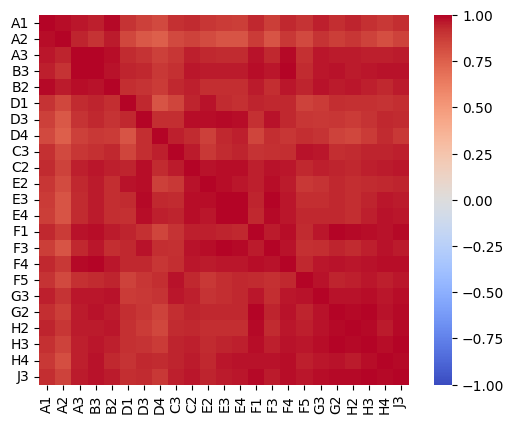

In [34]:
corr_mat = data_normal.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

У нормы корреляция всех признаков довольно равномерная.

<AxesSubplot: >

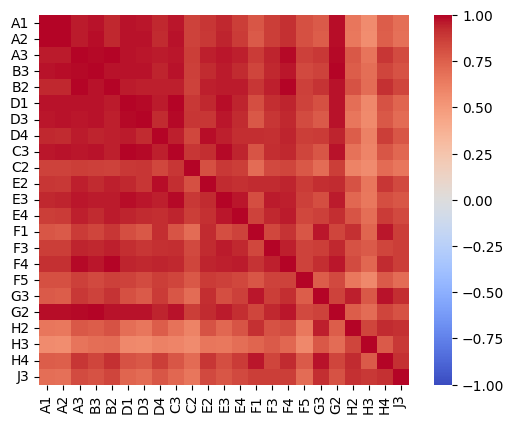

In [35]:
corr_mat = data_arrhythmia.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

А в данных с аритмией можно видеть, что корреляция значительно слабеет с последними столбцами.

Отобразим все данные в виде графиков.

<AxesSubplot: >

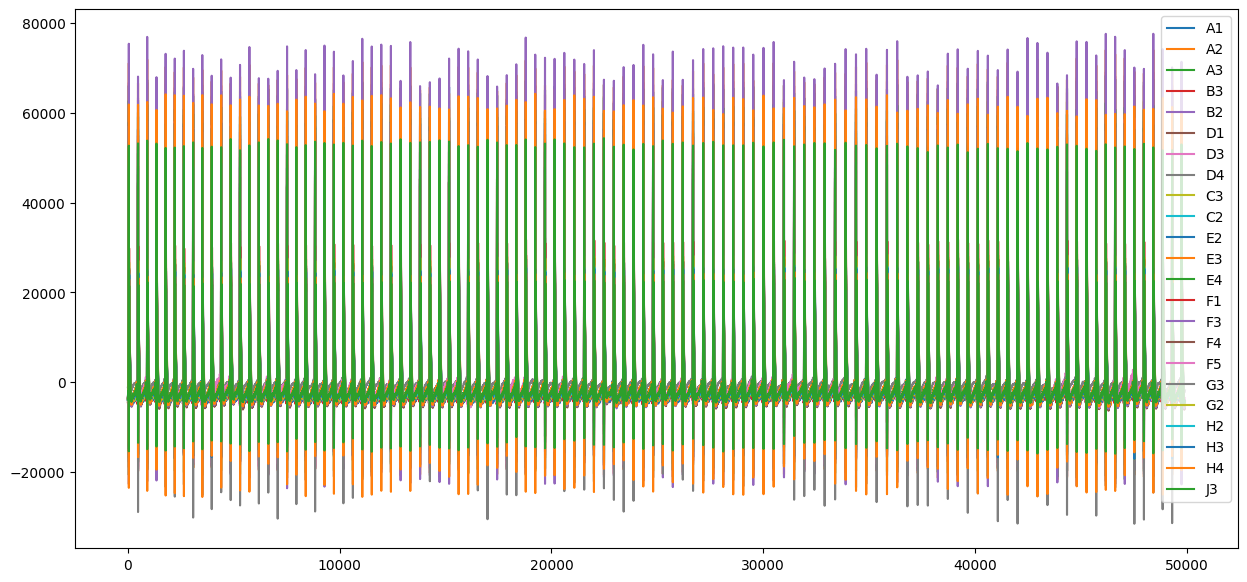

In [37]:
data_normal.plot(figsize=(15,7))

На графике в норме все интервалы примерно повторяют друг друга.

<AxesSubplot: >

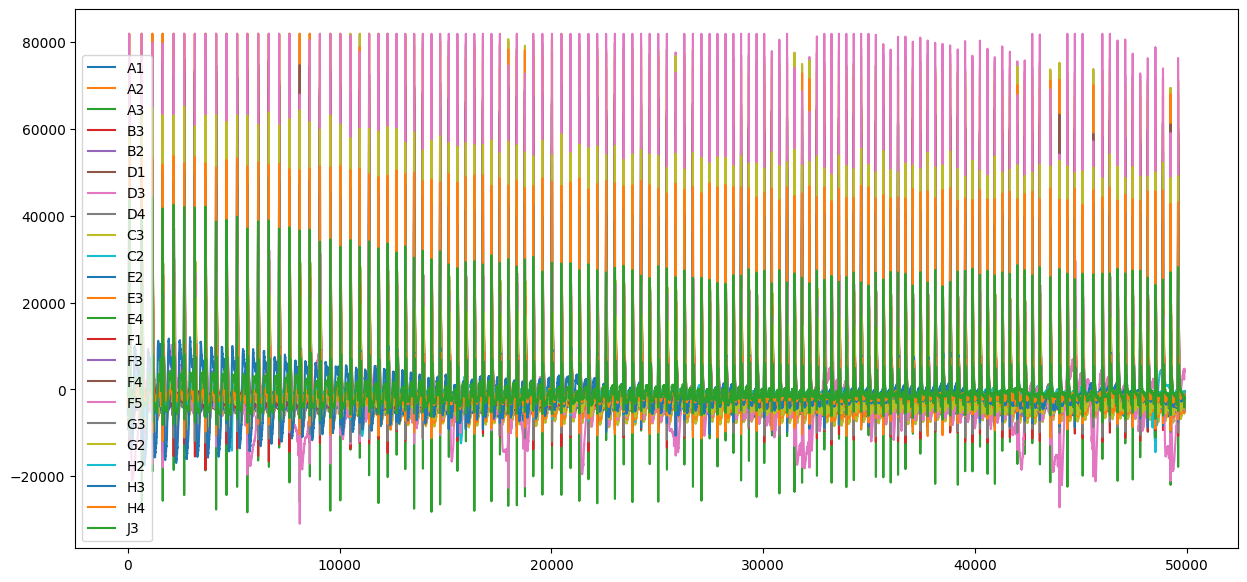

In [38]:
data_arrhythmia.plot(figsize=(15,7))

На графике с аритмией значения напряжений принимают хаотичный характер.

Теперь рассмотрим данные подробнее: выведем графики по одному интервалу ЭКГ.

<AxesSubplot: >

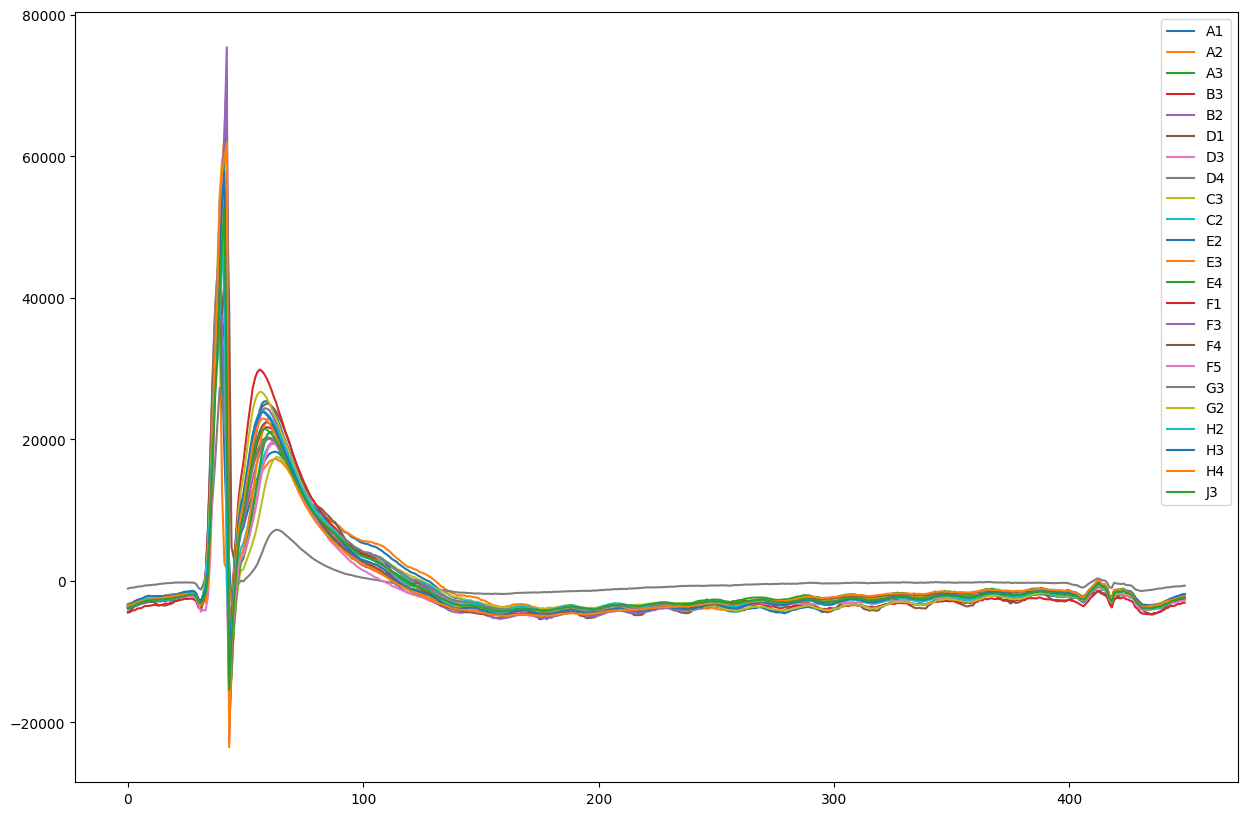

In [117]:
data_normal.head(450).plot(figsize=(15,10))

Как можно заметить, график в норме выглядит довольно плавно.

<AxesSubplot: >

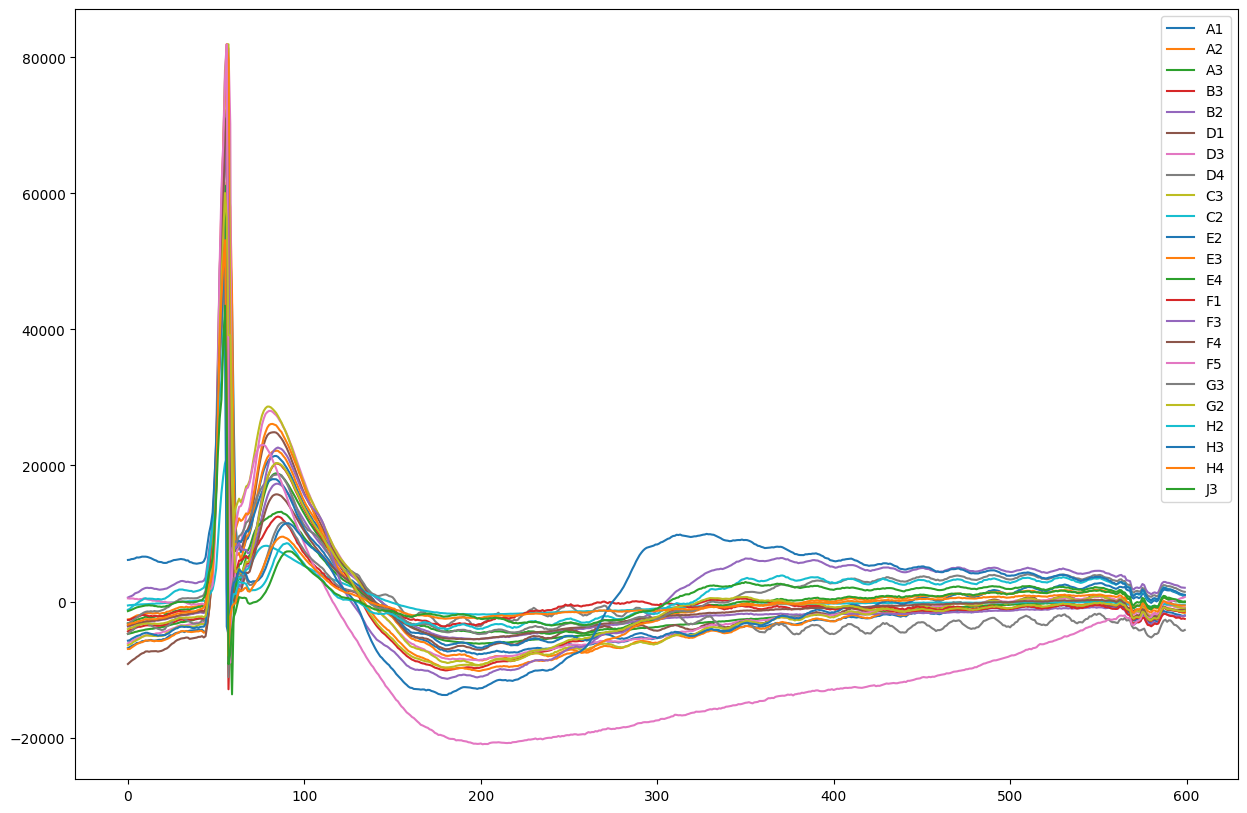

In [118]:
data_arrhythmia.head(600).plot(figsize=(15,10))

А при аритмии видны четкие отклонения по множеству электродов.

Визуализируем графики корреляции по всем столбцам:

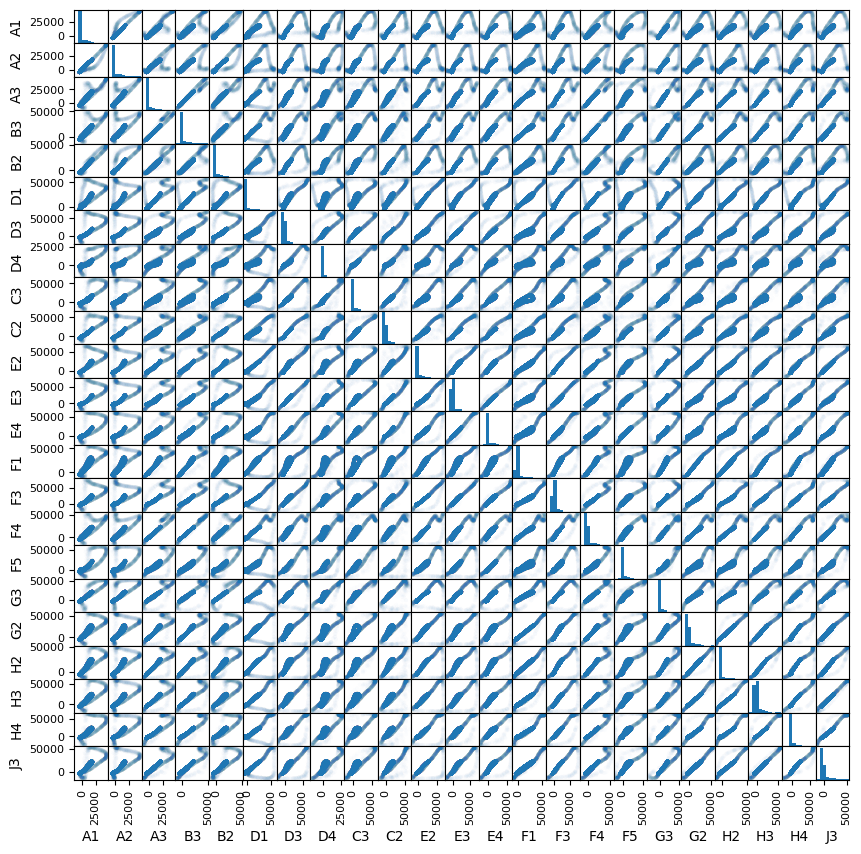

In [119]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_normal, alpha = .01, figsize = (10, 10))
pass

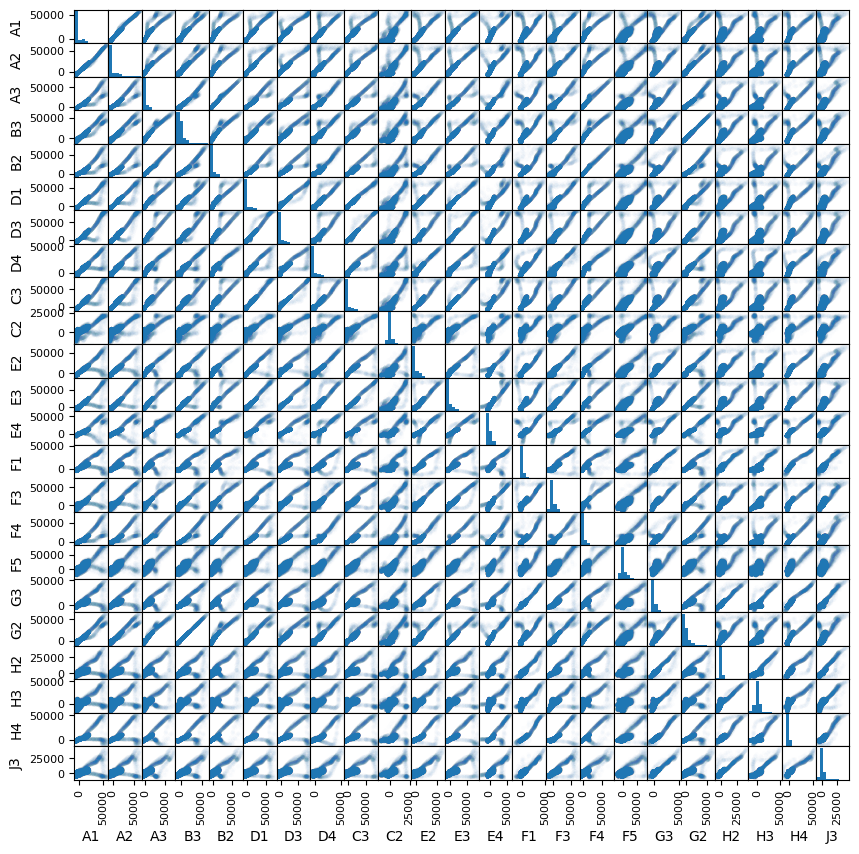

In [120]:
scatter_matrix(data_arrhythmia, alpha = .01, figsize = (10, 10))
pass

С большим количеством столбцов сложно увидеть разницу, поэтому визуализируем корреляцию по нескольким столбцам:

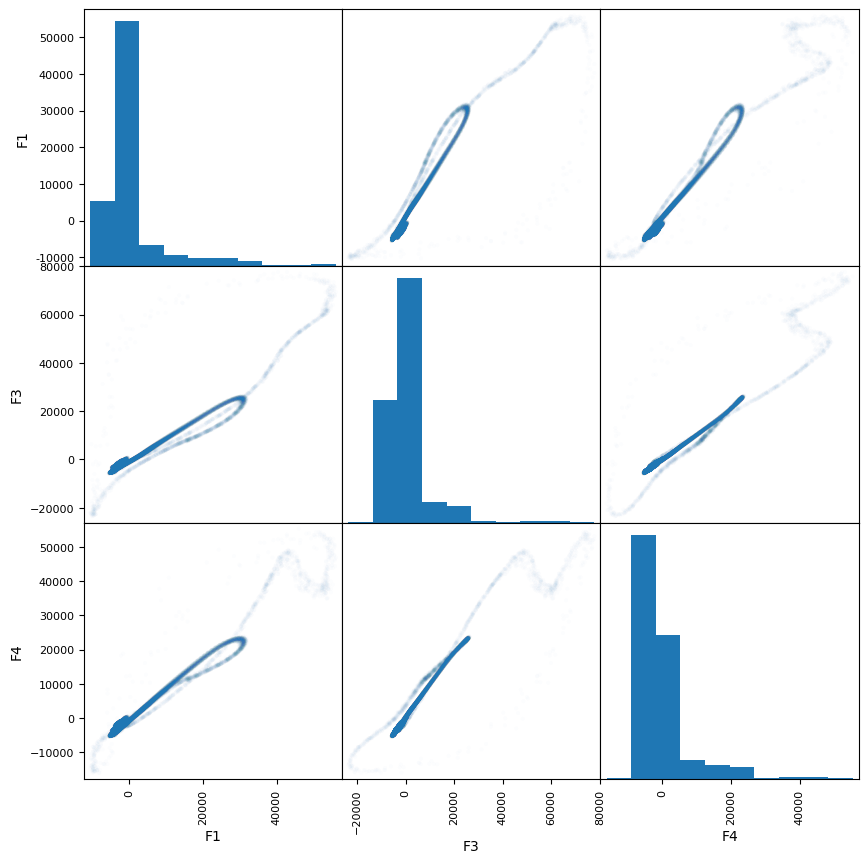

In [128]:
scatter_matrix(data_normal[['F1', 'F3', 'F4']], alpha = .01, figsize = (10, 10))
pass

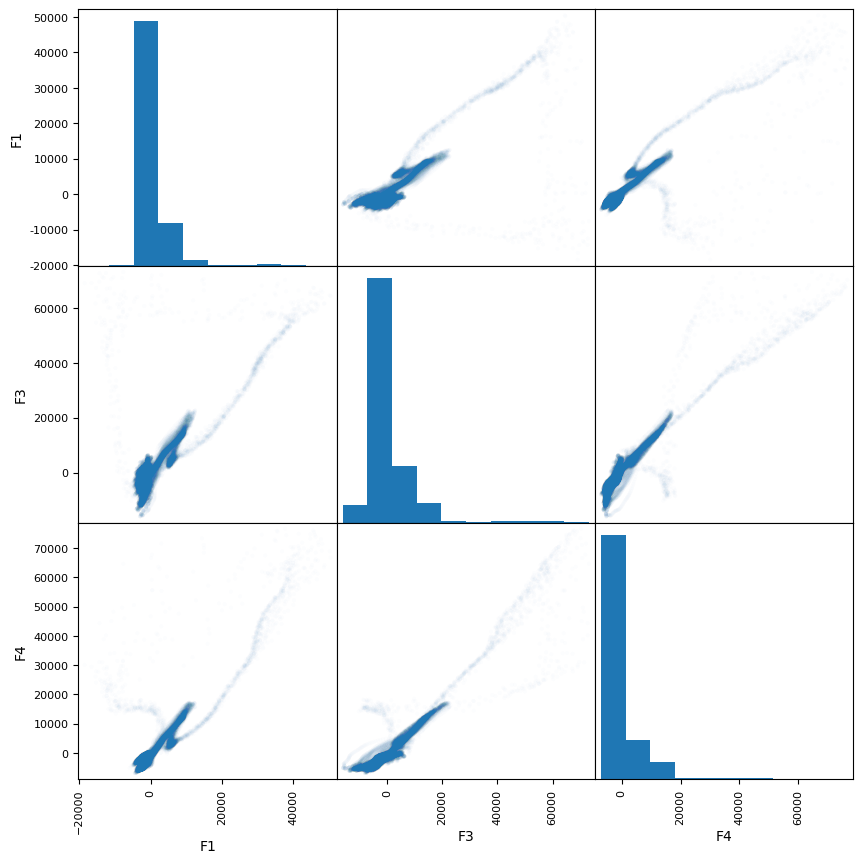

In [130]:
scatter_matrix(data_arrhythmia[['F1', 'F3', 'F4']], alpha = .01, figsize = (10, 10))
pass

По этим визуализациям можно увидеть, что корреляция столбцов в норме представляет из себя довольно четкие графики, в то время как при аритмии появляется некоторая хаотичность.